# 1. data_visualization.ipynb
This notebook explores the dataset by visualizing emotion distribution, audio waveforms and spectrograms.

## Imports and set-up

In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Path to the dataset
DATASET_DIR = "../data/raw/"

## 1.1. Visualize emotion distribution
Count the samples for each emotion based on the filenames

/tmp/ipykernel_161888/1346483254.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=emotion_labels, palette="viridis")


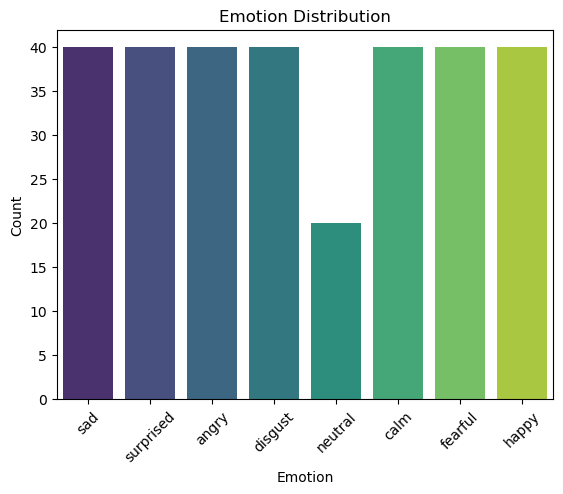

In [3]:
# Extract emotion labels from filenames
def extract_emotion(file_name):
    # Emotion code is in the third position (e.g., '03-01-06-01-02-02-01.wav')
    return int(file_name.split("-")[2])

file_names = [f for f in os.listdir(DATASET_DIR) if f.endswith(".wav")]
emotions = [extract_emotion(f) for f in file_names]

# Emotion mapping
emotion_map = {
    1: "neutral", 2: "calm", 3: "happy", 4: "sad",
    5: "angry", 6: "fearful", 7: "disgust", 8: "surprised"
}
emotion_labels = [emotion_map[e] for e in emotions]

# Plot distribution
sns.countplot(x=emotion_labels, palette="viridis")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 1.2. Visualize audio waveform
Select a sample audio file and visualize its waveform

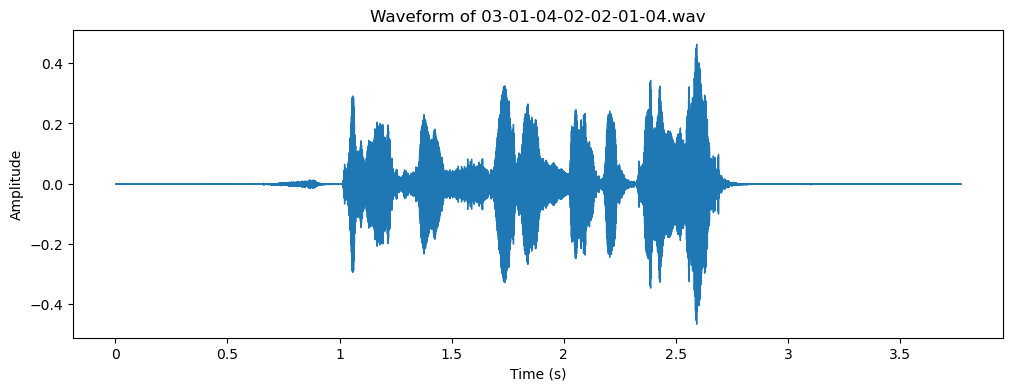

In [4]:
sample_file = os.path.join(DATASET_DIR, file_names[0])  # Pick a file
signal, sr = librosa.load(sample_file, sr=None)

plt.figure(figsize=(12, 4))
plt.title(f"Waveform of {file_names[0]}")
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

## 1.3. Visualize the spectrogram
Spectrogram plot to visualize the frequency components.

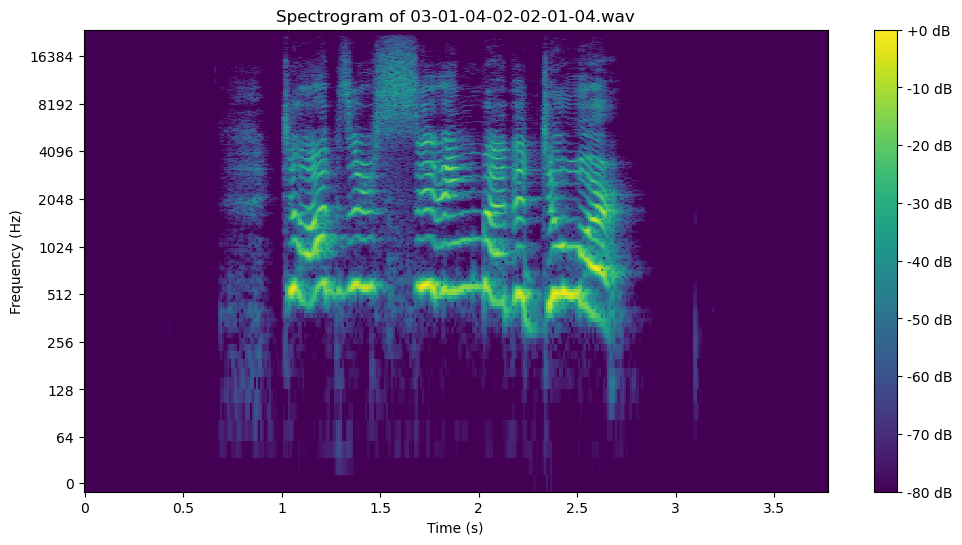

In [5]:
# Compute spectrogram
stft = np.abs(librosa.stft(signal))  # Short-Time Fourier Transform

plt.figure(figsize=(12, 6))
plt.title(f"Spectrogram of {file_names[0]}")
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), 
                         sr=sr, x_axis="time", y_axis="log", cmap="viridis")
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

## 1.4. Compare the waveforms accross emotions
Compare the waveforms of multiple emotions.

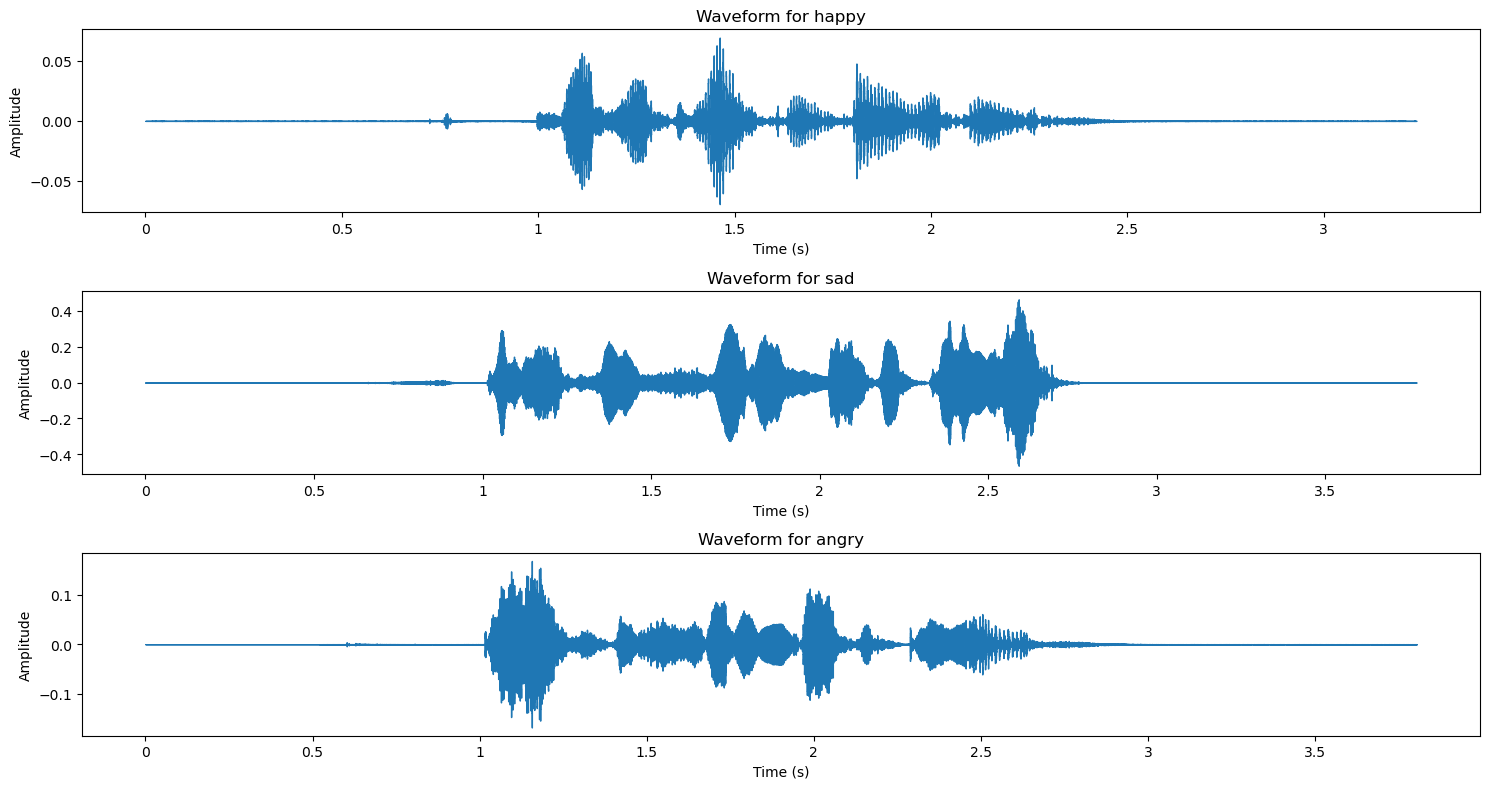

In [6]:
# Group files by emotion
emotion_files = {e: [] for e in emotion_map.values()}
for f in file_names:
    emotion = emotion_map[extract_emotion(f)]
    emotion_files[emotion].append(os.path.join(DATASET_DIR, f))

# Plot waveforms for a few emotions
plt.figure(figsize=(15, 8))
for i, emotion in enumerate(["happy", "sad", "angry"]):
    signal, sr = librosa.load(emotion_files[emotion][0], sr=None)
    plt.subplot(3, 1, i + 1)
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f"Waveform for {emotion}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()